# Example 1: Basic Grid Simulation and Plotting

This notebook demonstrates the basic functionality of WEC-GRID:
- Loading a power system model
- Running a basic simulation
- Creating visualizations with the plotting module
- Exploring grid state data

This example uses the IEEE 14-bus test system for demonstration.

## Initialize the WEC-GRID and an Engine

The Engine is the core component that manages power system simulations. We'll initialize it with the IEEE 14-bus test system.

In [1]:
import wecgrid



     __     __     ______     ______     ______     ______     __     _____
    /\ \  _ \ \   /\  ___\   /\  ___\   /\  ___\   /\  == \   /\ \   /\  __-.
    \ \ \/ ".\ \  \ \  __\   \ \ \____  \ \ \__ \  \ \  __<   \ \ \  \ \ \/\ \
     \ \__/".~\_\  \ \_____\  \ \_____\  \ \_____\  \ \_\ \_\  \ \_\  \ \____-
      \/_/   \/_/   \/_____/   \/_____/   \/_____/   \/_/ /_/   \/_/   \/____/
                


In [2]:
example1 = wecgrid.Engine("../../examples/WECGrid.db")
example1.case("../../examples/grid_models/IEEE_14_bus.RAW")
example1.load(["pypsa"])
example1

Engine:
├─ Case: IEEE 14 bus
├─ PyPSA: Loaded
├─ PSS/E: Not Loaded
├─ WEC-Farms/WECs: 0 - 0
└─ Buses: 14

Sbase: 100.0 MVA

## Explore the Grid State

WEC-Grid uses a unified GridState object to represent power system data across different power system modelers. Let's examine the grid structure.

In [3]:
grid = example1.pypsa.grid
print('='*60)
print(grid)
print('='*60)
print(grid.bus)
print('='*60)
print(grid.gen)
print('='*60)

GridState:
├─ Components:
│   ├─ bus:   14 components
│   ├─ gen:   5 components
│   ├─ line:  17 components
│   └─ load:  11 components
├─ Case: IEEE 14 bus
└─ Modeler: pypsa
    bus bus_name   type      p         q     v_mag  angle_deg  vbase
0     1    Bus_1  Slack  2.326 -0.087242  1.060000   0.000000  138.0
1     2    Bus_2     PV  0.183  0.458843  1.045000  -4.993087  138.0
2     3    Bus_3     PV -0.942  0.122554  1.010000 -12.761923  138.0
3     4    Bus_4     PQ -0.478  0.039000  1.012173 -10.237378  138.0
4     5    Bus_5     PQ -0.076 -0.016000  1.014855  -8.737987  138.0
5     6    Bus_6     PV -0.112  0.155034  1.070000 -14.413732  138.0
6     7    Bus_7     PQ  0.000  0.000000  1.049416 -13.237344  138.0
7     8    Bus_8     PV  0.000  0.251130  1.090000 -13.237344  138.0
8     9    Bus_9     PQ -0.295 -0.166000  1.032824 -14.818225  138.0
9    10   Bus_10     PQ -0.090 -0.058000  1.031825 -15.028840  138.0
10   11   Bus_11     PQ -0.035 -0.018000  1.047107 -14.839121  13

## Run a Basic Steady State Power Flow Simulation.

Now let's run a power flow simulation to solve the grid state and analyze the results with a load.

In [4]:
example1.simulate(num_steps=20) # only run a few iterations

PyPSA Simulating:   0%|          | 0/20 [00:00<?, ?step/s]

PyPSA Simulating: 100%|██████████| 20/20 [00:10<00:00,  1.93step/s]

Simulation complete: 10.38s


## Visualize the Grid with WEC-GRID Plotting

The WECGridPlot module provides basic visualization capabilities including single-line diagrams, time series plots, and more.

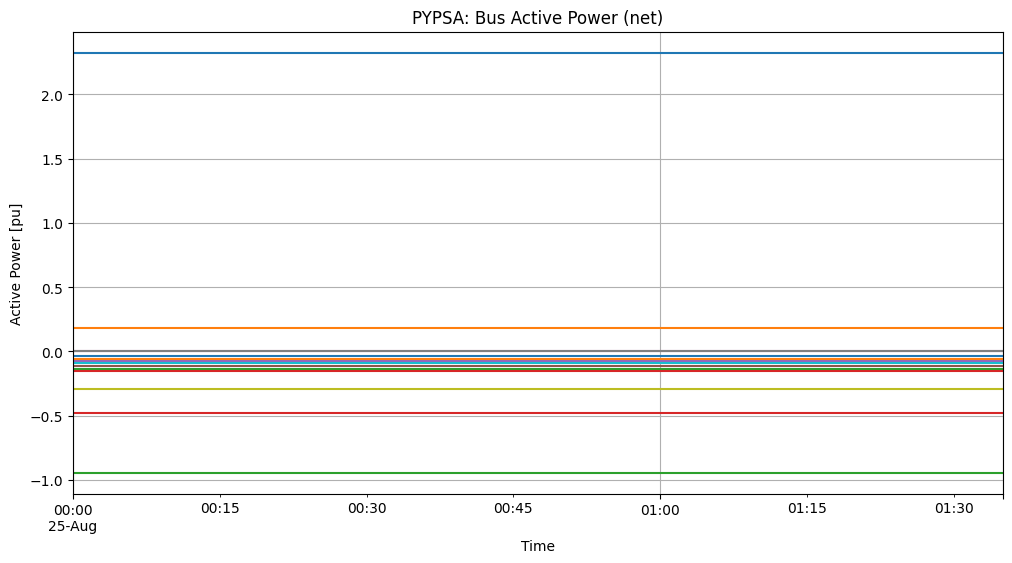

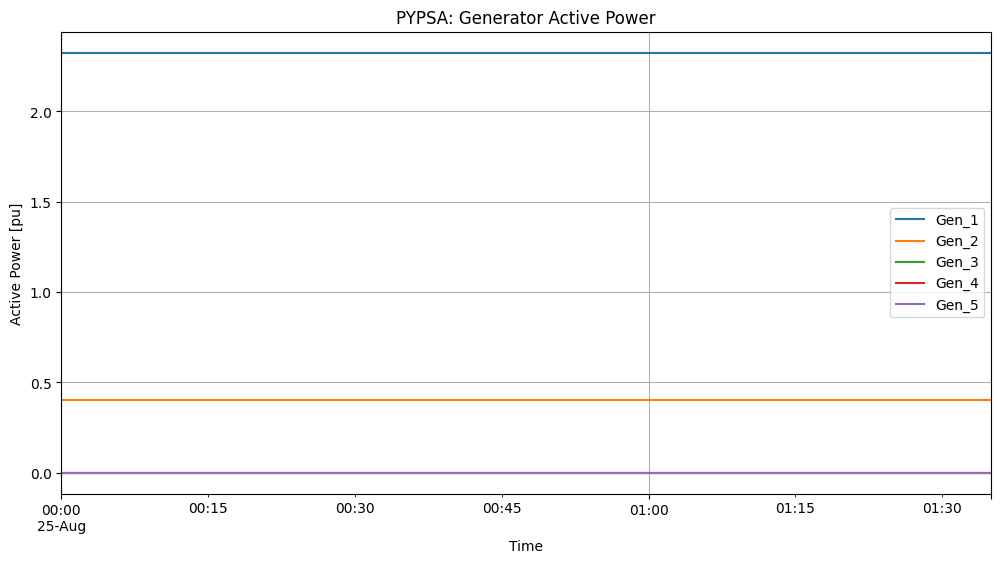

SLD Data Summary:
  Buses: 14
  Lines: 17
  Generators: 5
  Loads: 11


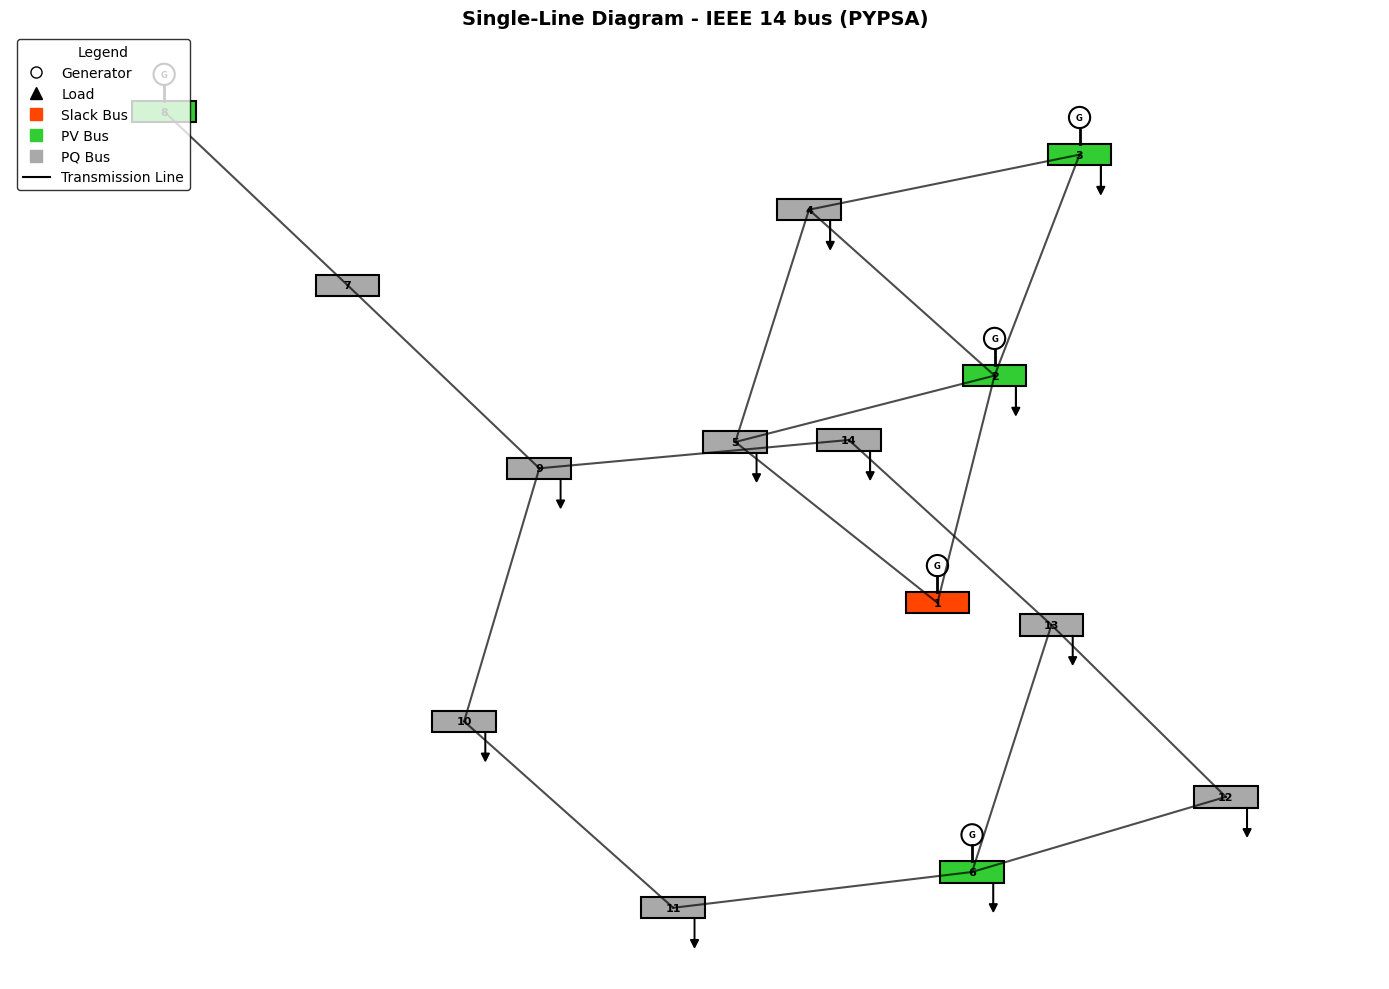

In [5]:
# should see flat lines
plot = example1.plot
plot.bus()
plot.gen()
plot.sld()